#**TUGAS PRAKTIKUM MANDIRI 12 MACHINE LEARNING PRINCIPAL COMPONENT ANALYSIS (PCA)**

Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi

#**Informasi Dataset**

Dataset yang digunakan pada praktikum ini adalah Breast Cancer Classification Dataset, yang berisi data medis hasil pemeriksaan kanker payudara. Dataset ini bertujuan untuk membantu proses klasifikasi kanker payudara ke dalam dua kategori, yaitu jinak (benign) dan ganas (malignant) berdasarkan karakteristik sel yang diamati.

Setiap baris data merepresentasikan satu sampel pasien, sedangkan setiap kolom fitur berisi nilai numerik yang menggambarkan karakteristik morfologi sel, seperti ukuran, tekstur, kelicinan, dan tingkat keparahan bentuk sel. Dataset ini memiliki jumlah fitur yang relatif banyak dan seluruh fitur bersifat numerik, sehingga sangat sesuai digunakan untuk penerapan reduksi dimensi menggunakan Principal Component Analysis (PCA) sebelum proses klasifikasi.

#**1. Import Library Dasar**

In [24]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#**2. Load Dataset Cancer Classification**

#**- Menyambungkan Colab dengan Drive**

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**- Membaca Dataset**

In [26]:
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum12/data/Cancer Classification.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Terdiri dari 569 baris dan 33 kolom.

#**3. Eksplorasi Awal Dataset**

#**- Membaca informasi data**

In [27]:
# informasi umum data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Terdapat 3 type data dari 33 kolom yaitu ada float(31), int(1) dan object(1)

#**- Membaca Statistik Deskriptif**

In [28]:
# Statistik deskriptif
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#**- Mengecek nilai missing value**

In [29]:
# Cek missing value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


#**- Menghapus kolom Unnamed**

In [30]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#**- Mengecek kembali nilai missing value**

In [31]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Menghilangkan kolom 'unnamed' yang ada missing valuenya, jadi sekarang sudah bersih.

#**- Mengecek data duplikat**

In [32]:
# Cek data duplikat
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat

#**4. Pemisahan Fitur dan Label**

In [33]:
# Menghapus kolom ID dan Unnamed: 32 jika ada
if 'id' in df.columns:
    df = df.drop('id', axis=1)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

# Encoding label (M = 1, B = 0)
# Menggunakan .str.strip() untuk membersihkan spasi ekstra sebelum mapping
df['diagnosis'] = df['diagnosis'].str.strip().map({'M': 1, 'B': 0})

# Pisahkan fitur dan label
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Hasil dari tahapan pemisahan fitur dan label adalah sebuah dataset yang telah bersih dan terstruktur dengan baik untuk proses pembelajaran mesin. Kolom yang tidak relevan seperti id dan Unnamed: 32 berhasil dihapus sehingga tidak memengaruhi analisis lebih lanjut. Kolom target diagnosis telah dikonversi ke dalam bentuk numerik, di mana nilai 1 merepresentasikan kanker ganas dan nilai 0 merepresentasikan kanker jinak, sehingga dapat diproses oleh algoritma klasifikasi. Selanjutnya, dataset dipisahkan menjadi dua bagian utama, yaitu matriks fitur X yang berisi seluruh variabel independen numerik, serta vektor label y yang berisi kelas target, yang kemudian siap digunakan pada tahap pembagian data, standardisasi, dan penerapan PCA.

#**5. Pembagian Data Latih dan Data Uji (Train-Test Split)**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Tahap ini menghasilkan data latih dan data uji dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Pembagian dilakukan dengan tetap menjaga keseimbangan distribusi kelas, sehingga data siap digunakan untuk proses pelatihan dan evaluasi model secara objekti

#**6. Standarisasi Data (Mean = 0, Std = 1)**

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tahap standarisasi menghasilkan data latih dan data uji yang telah berada pada skala yang sama, dengan nilai rata-rata mendekati nol dan standar deviasi mendekati satu. Proses ini memastikan tidak ada fitur yang mendominasi analisis karena perbedaan skala, sehingga data siap digunakan untuk penerapan PCA dan pelatihan model klasifikasi.

#**7. Penerapan Model SVM tanpa PCA (Baseline Model)**

In [36]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

# Evaluasi
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)
print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca))


Akurasi SVM tanpa PCA: 0.9736842105263158

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Hasil pengujian model SVM tanpa PCA menunjukkan akurasi sebesar 97,36%, yang menandakan bahwa model mampu melakukan klasifikasi dengan sangat baik menggunakan seluruh fitur asli. Nilai precision, recall, dan f1-score pada kedua kelas juga tinggi, menunjukkan bahwa model mampu membedakan data kanker jinak dan ganas secara konsisten. Hasil ini digunakan sebagai baseline untuk dibandingkan dengan performa model SVM setelah diterapkan reduksi dimensi menggunakan PCA.

#**8. Penerapan PCA (Principal Component Analysis)**

In [46]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Tahap penerapan PCA menghasilkan representasi data baru dalam bentuk dua komponen utama, yaitu PC1 dan PC2, yang merupakan kombinasi linier dari seluruh fitur asli. Melalui reduksi dimensi ini, jumlah fitur berkurang secara signifikan namun tetap mempertahankan sebagian besar informasi penting dari dataset, sehingga data menjadi lebih sederhana dan siap digunakan pada proses pelatihan serta evaluasi model klasifikasi

#**9. Menampilkan Variasi yang DIjelaskan oleh Setiap Komponen PCA**

In [38]:
explained_var = pca.explained_variance_ratio_

print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan:", explained_var.sum())


Explained Variance Ratio tiap komponen: [0.44593522 0.18545255]
Total variansi yang dijelaskan: 0.631387776559559


Hasil explained variance ratio menunjukkan bahwa komponen utama pertama (PC1) mampu menjelaskan sekitar 44,59% variansi data, sedangkan komponen utama kedua (PC2) menjelaskan sekitar 18,55% variansi. Secara keseluruhan, dua komponen utama tersebut telah mampu mempertahankan sekitar 63,14% informasi dari dataset asli, sehingga PCA berhasil mereduksi dimensi data dengan tetap menjaga sebagian besar informasi penting.

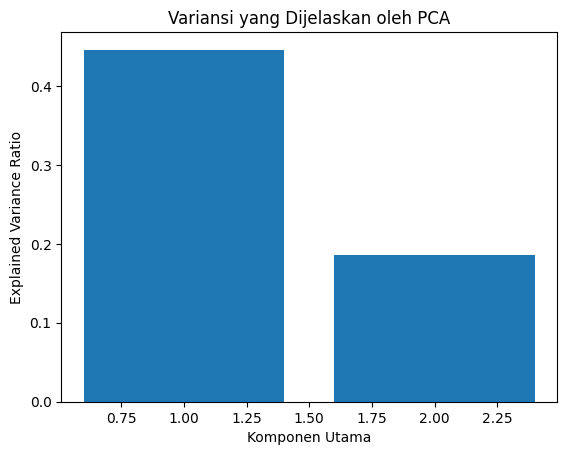

In [39]:
plt.bar([1, 2], explained_var)
plt.xlabel("Komponen Utama")
plt.ylabel("Explained Variance Ratio")
plt.title("Variansi yang Dijelaskan oleh PCA")
plt.show()


Grafik batang menunjukkan kontribusi masing-masing komponen utama PCA dalam menjelaskan variasi data. Komponen utama pertama (PC1) memiliki kontribusi terbesar, yaitu sekitar 44,6%, sedangkan komponen utama kedua (PC2) menjelaskan sekitar 18,5% variasi data. Hasil ini menegaskan bahwa sebagian besar informasi dataset telah ditangkap oleh PC1 dan PC2, sehingga reduksi dimensi menggunakan dua komponen utama sudah cukup representatif untuk analisis dan pemodelan selanjutnya.

#**10. Membangun Model SVM dengan PCA**

In [40]:
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA:", acc_pca)
print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca))


Akurasi SVM dengan PCA: 0.9298245614035088

Classification Report (dengan PCA):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



Hasil pengujian model SVM yang dilatih menggunakan data hasil reduksi dimensi PCA menunjukkan akurasi sebesar 92,98%. Meskipun terjadi penurunan akurasi dibandingkan model tanpa PCA, nilai precision, recall, dan f1-score pada kedua kelas masih berada pada tingkat yang baik. Hal ini menunjukkan bahwa PCA berhasil menyederhanakan data dengan mengurangi jumlah fitur, namun sebagian informasi penting ikut tereduksi sehingga berdampak pada performa klasifikasi.

#**11. Visualisasi PCA dalam Ruang 3 Dimensi**

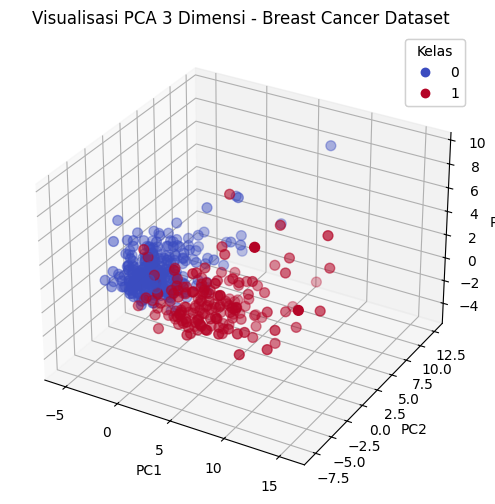

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Re-apply PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca_3d[:, 0],
    X_train_pca_3d[:, 1],
    X_train_pca_3d[:, 2],
    c=y_train,
    cmap='coolwarm',
    s=50
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Visualisasi PCA 3 Dimensi - Breast Cancer Dataset")

legend = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend)

plt.show()

Visualisasi PCA tiga dimensi menunjukkan pemetaan data breast cancer ke dalam ruang fitur baru yang dibentuk oleh tiga komponen utama, yaitu PC1, PC2, dan PC3. Titik data dengan kelas kanker jinak dan ganas membentuk dua kelompok yang relatif terpisah, meskipun masih terdapat beberapa titik yang saling berdekatan. Hal ini menandakan bahwa PCA mampu menangkap struktur utama data dan membantu memperlihatkan pola pemisahan kelas secara visual, meskipun pemisahan tersebut belum sepenuhnya sempurna.

#**12. Perbandingan Model SVM Tanpa PCA dengan PCA**

In [42]:
# Membuat tabel perbandingan performa model
comparison_df = pd.DataFrame({
    "Model": ["SVM Tanpa PCA", "SVM dengan PCA"],
    "Jumlah Fitur": [X.shape[1], pca.n_components_],
    "Akurasi": [acc_no_pca, acc_pca]
})

comparison_df


,Model,Jumlah Fitur,Akurasi
0,SVM Tanpa PCA,30,0.973684
1,SVM dengan PCA,2,0.929825


Tabel perbandingan menunjukkan bahwa model SVM tanpa PCA menggunakan 30 fitur dan menghasilkan akurasi sebesar 97,37%, sedangkan model SVM dengan PCA hanya menggunakan 2 komponen utama namun memperoleh akurasi sebesar 92,98%. Hasil ini menunjukkan bahwa penerapan PCA mampu mengurangi jumlah fitur secara signifikan, meskipun terdapat penurunan akurasi, sehingga memberikan trade-off antara efisiensi model dan performa klasifikasi.

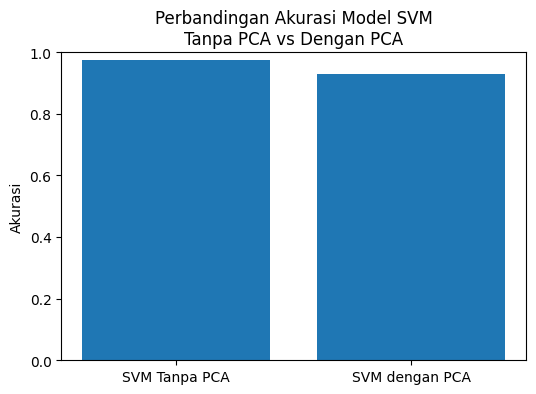

In [43]:
plt.figure(figsize=(6,4))
plt.bar(comparison_df["Model"], comparison_df["Akurasi"])
plt.ylim(0, 1)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model SVM\nTanpa PCA vs Dengan PCA")
plt.show()


Model SVM tanpa PCA menghasilkan akurasi sebesar 97,37%, sedangkan model SVM dengan PCA menghasilkan akurasi sebesar 92,98%. Hasil ini menunjukkan bahwa penerapan PCA menyebabkan penurunan akurasi sekitar 4,39%, namun berhasil mengurangi jumlah fitur secara signifikan sehingga model menjadi lebih sederhana dan efisien dalam proses komputasi.

#**KESIMPULAN**

Dataset Breast Cancer Classification memiliki jumlah fitur yang cukup banyak sehingga berpotensi meningkatkan kompleksitas model klasifikasi. Untuk mengatasi hal tersebut, Principal Component Analysis (PCA) digunakan sebagai teknik reduksi dimensi dengan tujuan menyederhanakan data tanpa menghilangkan terlalu banyak informasi penting. Melalui PCA, fitur-fitur asli berhasil dirangkum menjadi beberapa komponen utama yang mewakili pola utama dalam data.

Hasil pemodelan menunjukkan bahwa penggunaan seluruh fitur asli pada model SVM mampu menghasilkan akurasi yang sangat tinggi, yaitu sebesar 97,37%. Sementara itu, ketika PCA diterapkan dan jumlah fitur direduksi menjadi dua komponen utama, akurasi model sedikit menurun menjadi 92,98%. Penurunan ini menunjukkan bahwa sebagian informasi yang berkontribusi terhadap ketepatan klasifikasi ikut tereduksi bersama fitur-fitur lainnya.

Meskipun demikian, penerapan PCA tetap memberikan manfaat yang signifikan, terutama dalam hal penyederhanaan data dan efisiensi komputasi. Model dengan PCA bekerja menggunakan fitur yang jauh lebih sedikit, sehingga lebih ringan dan lebih mudah dianalisis, serta tetap mampu mempertahankan performa klasifikasi yang cukup baik. Dengan demikian, PCA dapat menjadi solusi yang efektif ketika efisiensi dan kesederhanaan model lebih diutamakan, meskipun harus menerima adanya trade-off terhadap tingkat akurasi yang dihasilkan.